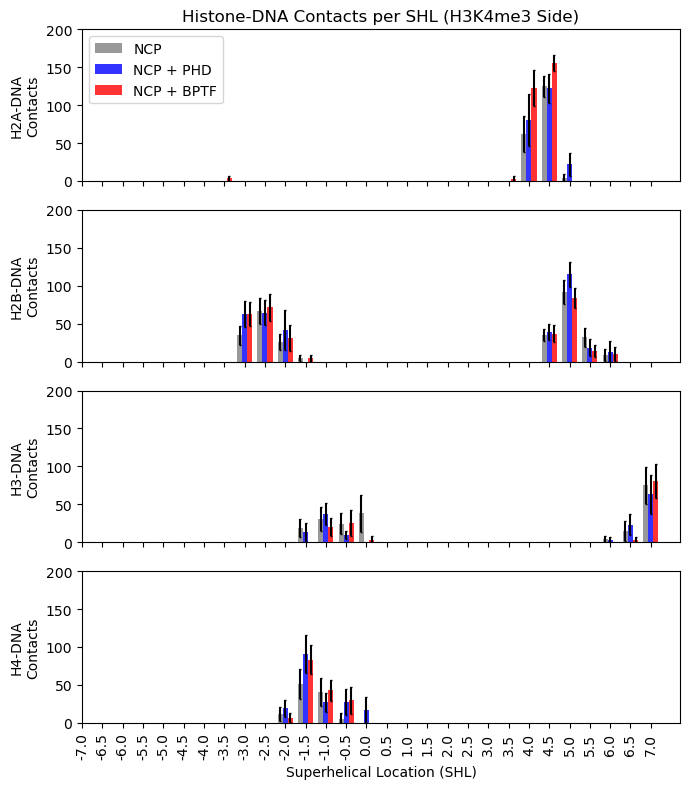

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

prefixes = ["nucleosome", "phd_ncp", "bptf_ncp"]
colors = ["gray", "blue", "red"]
shl_values = np.arange(-7.0, 7.5, 0.5)  # SHL from -7.0 to +7.0
data_dir = "./"
bar_width = 0.25
threshold = 2  # Only plot bars with mean contact above this

# Histones to process
histones = ["H2A", "H2B", "H3", "H4"]

# Store results: {prefix: DataFrame}
dfs = {}

# Read and summarize contact data
for prefix in prefixes:
    data = []
    for shl in shl_values:
        filepath = os.path.join(data_dir, f"{prefix}_shl1_{shl:.1f}.dat")
        if not os.path.isfile(filepath):
            print(f"Missing: {filepath}")
            continue
        df = pd.read_csv(filepath, delim_whitespace=True, comment="#", header=None,
                         names=["frame", "H2A", "H2B", "H3", "H4"])
        row = [shl]
        for h in histones:
            mean = df[h].mean()
            sem = df[h].std() / np.sqrt(5)  # Assuming 5 replicas
            row.extend([mean, sem])
        data.append(row)
    # Build dataframe for each prefix
    col_names = ["SHL"]
    for h in histones:
        col_names.extend([f"Mean_{h}", f"SEM_{h}"])
    dfs[prefix] = pd.DataFrame(data, columns=col_names).sort_values("SHL")

# === Plotting ===
fig, axes = plt.subplots(len(histones), 1, figsize=(7, 8), sharex=True)

label_map = {
    "nucleosome": "NCP",
    "phd_ncp": "NCP + PHD",
    "bptf_ncp": "NCP + BPTF"
}

x = np.arange(len(shl_values))
plotted_labels = set()

for i, (prefix, color) in enumerate(zip(prefixes, colors)):
    df = dfs[prefix]
    offset = (i - 1) * bar_width  # center bars around SHL positions

    for j, histone in enumerate(histones):
        ax = axes[j]
        mean_col = f"Mean_{histone}"
        sem_col = f"SEM_{histone}"

        for idx, row in df.iterrows():
            if row[mean_col] >= threshold:
                shl_idx = np.where(shl_values == row["SHL"])[0][0]
                label = label_map[prefix] if label_map[prefix] not in plotted_labels else None
                ax.bar(
                    x=shl_idx + offset,
                    height=row[mean_col],
                    yerr=row[sem_col],
                    width=bar_width,
                    color=color,
                    label=label,
                    alpha=0.8,
                    capsize=1
                )
                if label:
                    plotted_labels.add(label)

# === Axes formatting ===
for j, histone in enumerate(histones):
    axes[j].set_ylabel(f"{histone}-DNA\nContacts")
    axes[j].set_ylim(0, 200)

axes[-1].set_xlabel("Superhelical Location (SHL)")
axes[0].legend()
axes[0].set_title("Histone-DNA Contacts per SHL (H3K4me3 Side)")
plt.xticks(
    ticks=np.arange(len(shl_values)),
    labels=[f"{val:.1f}" for val in shl_values],
    rotation=90
)
plt.tight_layout()
plt.savefig("histone_dna_shl1.pdf")

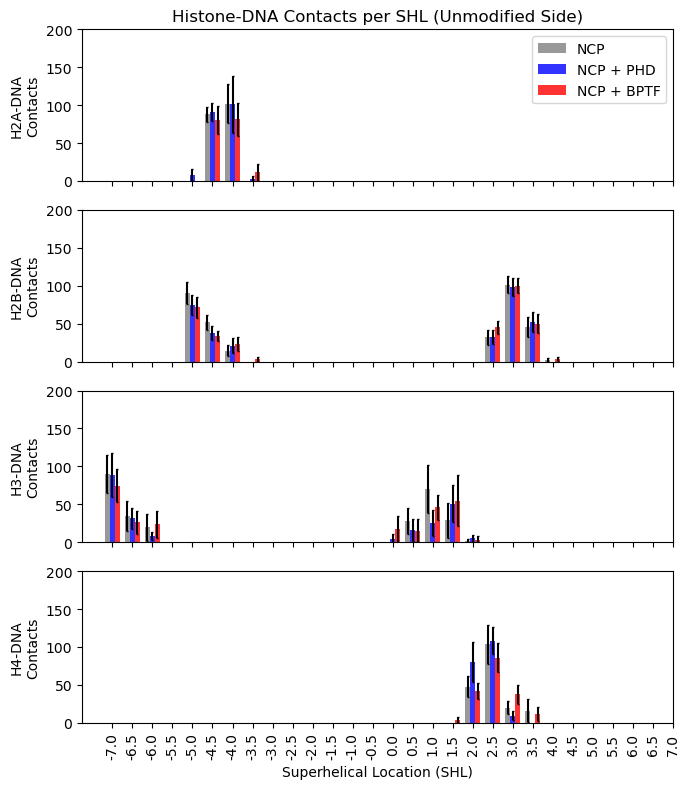

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

prefixes = ["nucleosome", "phd_ncp", "bptf_ncp"]
colors = ["gray", "blue", "red"]
shl_values = np.arange(-7.0, 7.5, 0.5)  # SHL from -7.0 to +7.0
data_dir = "./"
bar_width = 0.25
threshold = 2  # Only plot bars with mean contact above this

# Histones to process
histones = ["H2A", "H2B", "H3", "H4"]

# Store results: {prefix: DataFrame}
dfs = {}

# Read and summarize contact data
for prefix in prefixes:
    data = []
    for shl in shl_values:
        filepath = os.path.join(data_dir, f"{prefix}_shl2_{shl:.1f}.dat")
        if not os.path.isfile(filepath):
            print(f"Missing: {filepath}")
            continue
        df = pd.read_csv(filepath, delim_whitespace=True, comment="#", header=None,
                         names=["frame", "H2A", "H2B", "H3", "H4"])
        row = [shl]
        for h in histones:
            mean = df[h].mean()
            sem = df[h].std() / np.sqrt(5)  # Assuming 5 replicas
            row.extend([mean, sem])
        data.append(row)
    # Build dataframe for each prefix
    col_names = ["SHL"]
    for h in histones:
        col_names.extend([f"Mean_{h}", f"SEM_{h}"])
    dfs[prefix] = pd.DataFrame(data, columns=col_names).sort_values("SHL")

# === Plotting ===
fig, axes = plt.subplots(len(histones), 1, figsize=(7, 8), sharex=True)

label_map = {
    "nucleosome": "NCP",
    "phd_ncp": "NCP + PHD",
    "bptf_ncp": "NCP + BPTF"
}

x = np.arange(len(shl_values))
plotted_labels = set()

for i, (prefix, color) in enumerate(zip(prefixes, colors)):
    df = dfs[prefix]
    offset = (i - 1) * bar_width  # center bars around SHL positions

    for j, histone in enumerate(histones):
        ax = axes[j]
        mean_col = f"Mean_{histone}"
        sem_col = f"SEM_{histone}"

        for idx, row in df.iterrows():
            if row[mean_col] >= threshold:
                shl_idx = np.where(shl_values == row["SHL"])[0][0]
                label = label_map[prefix] if label_map[prefix] not in plotted_labels else None
                ax.bar(
                    x=shl_idx + offset,
                    height=row[mean_col],
                    yerr=row[sem_col],
                    width=bar_width,
                    color=color,
                    label=label,
                    alpha=0.8,
                    capsize=1
                )
                if label:
                    plotted_labels.add(label)

# === Axes formatting ===
for j, histone in enumerate(histones):
    axes[j].set_ylabel(f"{histone}-DNA\nContacts")
    axes[j].set_ylim(0, 200)

axes[-1].set_xlabel("Superhelical Location (SHL)")
axes[0].legend()
axes[0].set_title("Histone-DNA Contacts per SHL (Unmodified Side)")
plt.xticks(
    ticks=np.arange(len(shl_values)),
    labels=[f"{val:.1f}" for val in shl_values],
    rotation=90
)
plt.tight_layout()
plt.savefig("histone_dna_shl2.pdf")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Makes scatterplots of H3 vs H4 at superhelical locations to show that they simultaneously bind DNA near each other
# Settings
prefixes = ["nucleosome", "phd_ncp", "bptf_ncp"]
labels = ["NCP", "NCP + PHD", "NCP + BPTF"]
colors = ["gray", "blue", "red"]
shl_range = np.arange(-2.0, 0.1, 0.5)
data_dir = "./"

for shl in shl_range:
    fig, axes = plt.subplots(1, 3, figsize=(6, 3), sharex=True, sharey=True)

    for ax, prefix, label, color in zip(axes, prefixes, labels, colors):
        filepath = os.path.join(data_dir, f"{prefix}_shl1_{shl:.1f}.dat")
        if not os.path.isfile(filepath):
            print(f"Missing: {filepath}")
            continue

        df = pd.read_csv(filepath, delim_whitespace=True, comment="#", header=None,
                         names=["frame", "H2A", "H2B", "H3", "H4"])

        ax.scatter(df["H3"], df["H4"], alpha=0.6, color=color, edgecolor="k", linewidth=0.2)
        ax.set_title(f"{label}")
        ax.set_xlabel("H3 Contacts")
        ax.set_ylabel("H4 Contacts")
        ax.grid(True)

    fig.suptitle(f"H3 vs. H4 Contacts — SHL {shl:.1f}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.savefig(f"h3_vs_h4_contacts_shl_{shl:.1f}.pdf")
    plt.close()
